In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pandas as pd

In [2]:
plugins = pd.read_json('data/plugins.json').sort_index()
pedalboards = pd.read_json('data/plugins-pedalboards.json').sort_index(axis=1)

# Gambiarra para alterar o nome da coluna de plugin 
plugins_copy = plugins.copy()
plugins_copy['Plugin'] = plugins_copy.name
plugins_copy['Category'] = plugins_copy.category

pedalboards.columns = [plugins_copy.Category, plugins_copy.Plugin]

pedalboards.head(2)

Category Filter_EQ Modulation     SFX Modulation    Delay                     \
Plugin    M-Filter    TheVibe Z-Organ     Slicer PhaseDly FilterDly PitchDly   
0                0          0       0          0        0         0        0   
1                0          0       0          0        0         0        0   

Category           Modulation    SFX  ...   None Amp Modeling            \
Plugin   StereoDly   BitCrush Bomber  ...   None    TONE CITY B-BREAKER   
0                0          0      0  ...      3            0         0   
1                0          0      0  ...      1            0         0   

Category                                                           
Plugin   BGN DRIVE DELUXE-R ALIEN REVO-1 CAR DRIVE MS 1959 VX JMI  
0                0        0     0      0         0       0      0  
1                0        0     0      0         0       0      0  

[2 rows x 117 columns]

In [3]:
from probability.experiment import Experiment
from probability.probability_distribution import ProbabilityDistribution

soma_plugins = pedalboards.sum()
#del soma_plugins['None']

P = ProbabilityDistribution.from_joint_distribution(soma_plugins).normalize()
P.series.head(10)

Category    Plugin   
Filter_EQ   M-Filter     0.000742
Modulation  TheVibe      0.004204
SFX         Z-Organ      0.001731
Modulation  Slicer       0.001236
Delay       PhaseDly     0.000495
            FilterDly    0.002226
            PitchDly     0.003462
            StereoDly    0.018051
Modulation  BitCrush     0.001731
SFX         Bomber       0.000000
dtype: float64

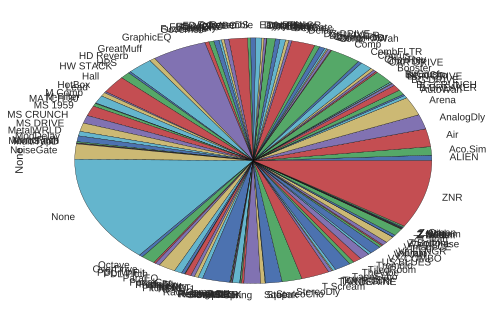

In [4]:
Category, Plugin = P.variables

P(Plugin).plot.pie()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

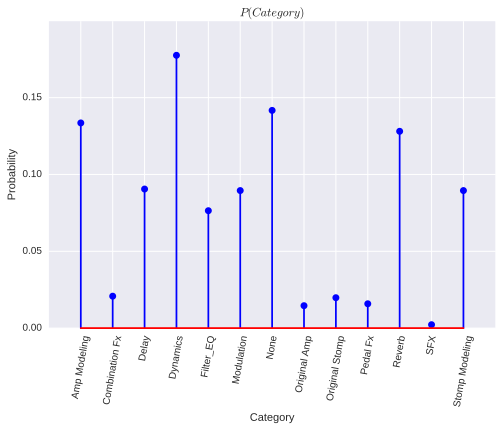

In [5]:
a = P(Category).plot()
a.xticks(rotation=80)

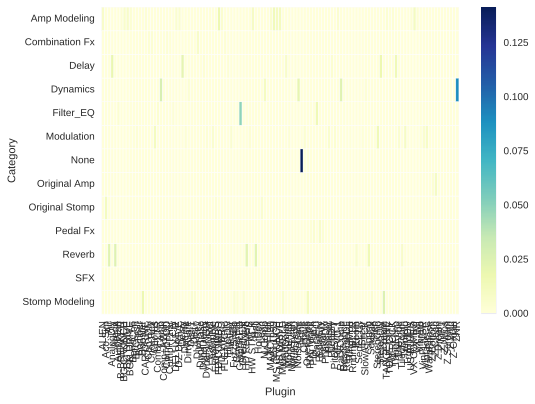

In [6]:
P.plot()

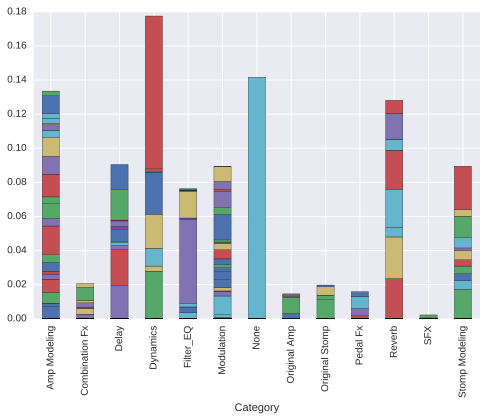

In [7]:
P.plot.stacked_bar(legend=False)